<a href="https://colab.research.google.com/github/RojaCM/DEEP-LEARNING-/blob/main/face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:09<00:00, 18.7MB/s]
100% 163M/163M [00:09<00:00, 17.8MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1551.jpg', 'with_mask_1471.jpg', 'with_mask_658.jpg', 'with_mask_430.jpg', 'with_mask_2679.jpg']
['with_mask_863.jpg', 'with_mask_759.jpg', 'with_mask_3220.jpg', 'with_mask_1303.jpg', 'with_mask_1339.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_328.jpg', 'without_mask_895.jpg', 'without_mask_2599.jpg', 'without_mask_3220.jpg', 'without_mask_3626.jpg']
['without_mask_964.jpg', 'without_mask_2859.jpg', 'without_mask_596.jpg', 'without_mask_2182.jpg', 'without_mask_3005.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

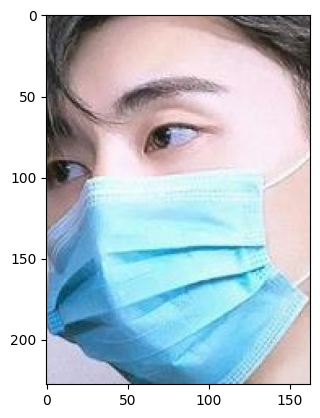

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

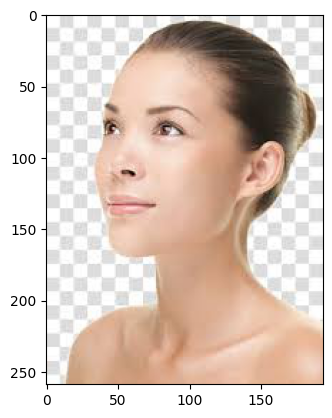

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

In [19]:
data[0]

array([[[201, 189, 193],
        [201, 189, 193],
        [201, 189, 193],
        ...,
        [198, 186, 190],
        [198, 186, 190],
        [198, 186, 190]],

       [[201, 189, 193],
        [201, 189, 193],
        [201, 189, 193],
        ...,
        [198, 186, 190],
        [198, 186, 190],
        [198, 186, 190]],

       [[201, 189, 193],
        [201, 189, 193],
        [201, 189, 193],
        ...,
        [198, 186, 190],
        [198, 186, 190],
        [198, 186, 190]],

       ...,

       [[204, 192, 202],
        [204, 192, 202],
        [205, 193, 203],
        ...,
        [201, 190, 198],
        [203, 192, 200],
        [201, 190, 198]],

       [[204, 192, 203],
        [204, 192, 203],
        [205, 193, 204],
        ...,
        [201, 190, 198],
        [203, 192, 200],
        [201, 190, 198]],

       [[204, 192, 203],
        [204, 192, 203],
        [205, 193, 204],
        ...,
        [201, 190, 198],
        [202, 191, 199],
        [201, 190, 198]]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [30]:
X_train[0]

array([[[  0,  72,  82],
        [  4,  78,  89],
        [ 14,  86,  98],
        ...,
        [  9,   1,   8],
        [  6,   2,  17],
        [  9,   7,  12]],

       [[  0,  73,  82],
        [  3,  80,  89],
        [ 14,  86,  98],
        ...,
        [  8,   2,  19],
        [  5,   2,  26],
        [  6,   6,  17]],

       [[  0,  73,  84],
        [  4,  79,  92],
        [ 14,  87, 101],
        ...,
        [  1,   1,  21],
        [  2,   2,  23],
        [  1,   7,  16]],

       ...,

       [[248, 248, 248],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [187, 206, 208],
        [186, 205, 206],
        [185, 204, 205]],

       [[249, 249, 249],
        [250, 250, 250],
        [252, 252, 252],
        ...,
        [185, 203, 205],
        [184, 202, 204],
        [183, 201, 203]],

       [[249, 249, 249],
        [250, 250, 250],
        [252, 252, 252],
        ...,
        [183, 203, 204],
        [182, 202, 203],
        [181, 201, 202]]

In [31]:
X_train_scaled[0]

array([[[0.        , 0.28235294, 0.32156863],
        [0.01568627, 0.30588235, 0.34901961],
        [0.05490196, 0.3372549 , 0.38431373],
        ...,
        [0.03529412, 0.00392157, 0.03137255],
        [0.02352941, 0.00784314, 0.06666667],
        [0.03529412, 0.02745098, 0.04705882]],

       [[0.        , 0.28627451, 0.32156863],
        [0.01176471, 0.31372549, 0.34901961],
        [0.05490196, 0.3372549 , 0.38431373],
        ...,
        [0.03137255, 0.00784314, 0.0745098 ],
        [0.01960784, 0.00784314, 0.10196078],
        [0.02352941, 0.02352941, 0.06666667]],

       [[0.        , 0.28627451, 0.32941176],
        [0.01568627, 0.30980392, 0.36078431],
        [0.05490196, 0.34117647, 0.39607843],
        ...,
        [0.00392157, 0.00392157, 0.08235294],
        [0.00784314, 0.00784314, 0.09019608],
        [0.00392157, 0.02745098, 0.0627451 ]],

       ...,

       [[0.97254902, 0.97254902, 0.97254902],
        [0.97647059, 0.97647059, 0.97647059],
        [0.98431373, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 21ms/step - loss: 0.4807 - acc: 0.7936 - val_loss: 0.2031 - val_acc: 0.9157
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2944 - acc: 0.8832 - val_loss: 0.1681 - val_acc: 0.9339
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2292 - acc: 0.9075 - val_loss: 0.1834 - val_acc: 0.9322
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1903 - acc: 0.9222 - val_loss: 0.1385 - val_acc: 0.9438
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1584 - acc: 0.9388 - val_loss: 0.1457 - val_acc: 0.9372


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.2096 - acc: 0.9146
Test Accuracy = 0.9146260619163513


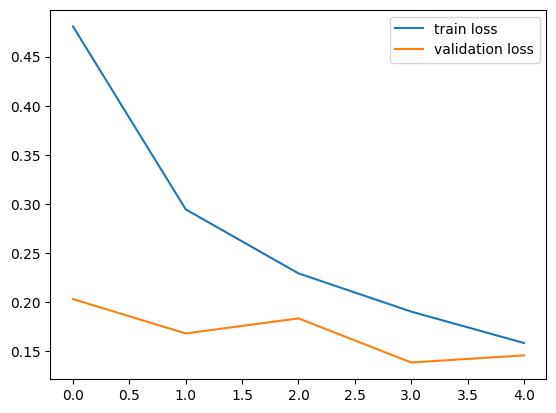

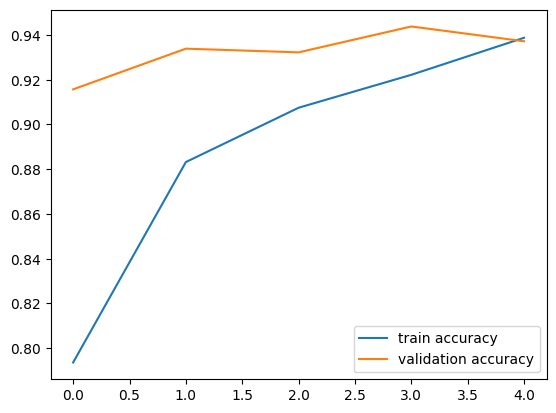

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/images (1).jfif


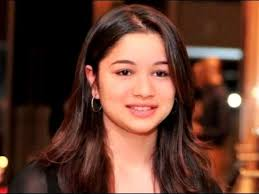

1/1 [==============================] - 0s 162ms/step
[[0.46620736 0.4809955 ]]
1
The person in the image is wearing a mask


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/images (2).jfif


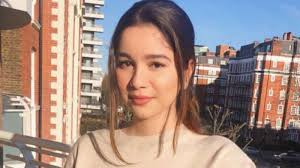

1/1 [==============================] - 0s 19ms/step
[[0.36349064 0.73698545]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')